In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(1)
np.random.seed(1)

In [22]:
def M(x):
    return np.where(abs(x) > 1, 0, abs(x))

In [23]:
count=100000

In [24]:
def draw_RV_X(lower = -1.0, upper = 1, leastCount = 0.001, size = count, pdf = M):
  arr = np.linspace(lower,upper,int((upper - lower)/leastCount))
  return np.array(random.choices(population = arr, weights = list(map(pdf, arr)), k = size))

In [25]:
arr = draw_RV_X()
arr

array([-0.85592796,  0.83391696,  0.72686343, ..., -0.92896448,
       -0.1925963 ,  0.52076038])

In [26]:
arr.sort()

In [27]:
arr

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [28]:
arr.mean()

-0.00010800400200104833

In [29]:
abs(arr)

array([1., 1., 1., ..., 1., 1., 1.])

In [30]:
abs(arr).sum()

66654.49224612306

In [31]:
np.mean(np.abs(arr))

0.6665449224612306

In [32]:
np.abs(arr).sum()/count

0.6665449224612306

In [33]:
import matplotlib.pyplot as plt
def plot_RV(lower = -1.0, upper = 1.0, leastCount = 0.001, size = count, pdf = M, bins = 200):
  count, bins, ignored = plt.hist(draw_RV_X(lower,upper,leastCount,size,pdf), bins, density = True)
  plt.show()

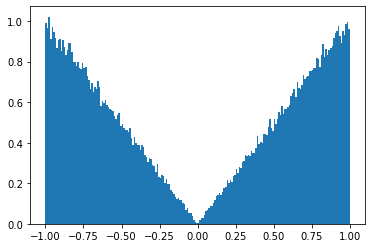

In [34]:
plot_RV()

In [35]:
def plot_cdf(arr):
    least_count=0.01
    sorted_arr = np.sort(arr)
    ans=[]
    val=-1
    index=0
    for i in sorted_arr:
        index+=1
        if i >val+least_count:
            val+=least_count
            ans.append(index/count)
    plt.plot(np.linspace(-1, 1, len(ans)), ans)
    plt.show()

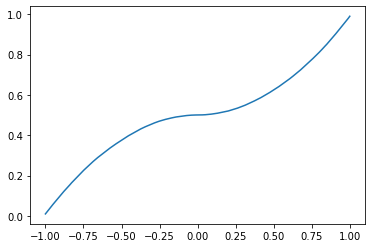

In [36]:
plot_cdf(arr)

In [37]:
def draw_RV_Y(n, lower = -1.0, upper = 1, leastCount = 0.001, size = count, pdf = M):
    arr = np.linspace(lower,upper,int((upper - lower)/leastCount))
    Y = np.array(random.choices(population = arr, weights = list(map(pdf, arr)), k = size))

    for i in range(n-1):
        Y =Y+ np.array(random.choices(population = arr, weights = list(map(pdf, arr)), k = size))
    Y/=n
    return Y

In [38]:
arr = draw_RV_Y(1)

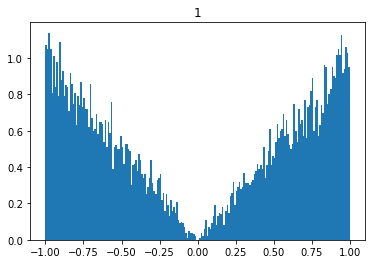

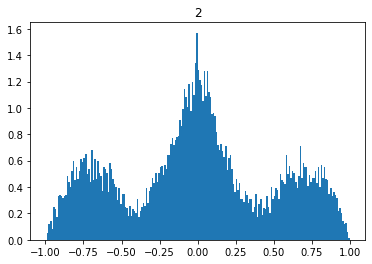

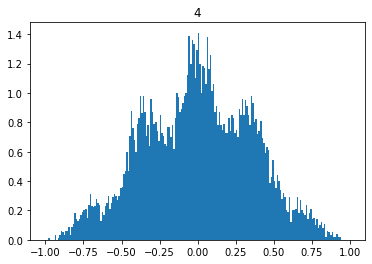

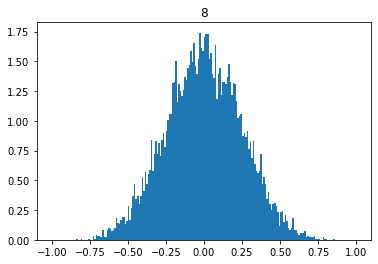

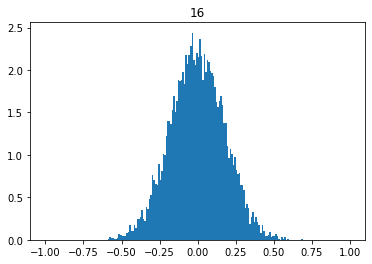

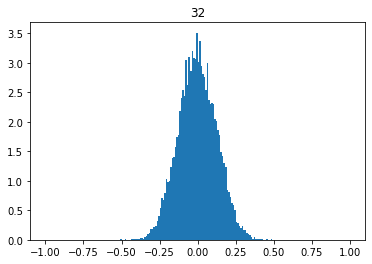

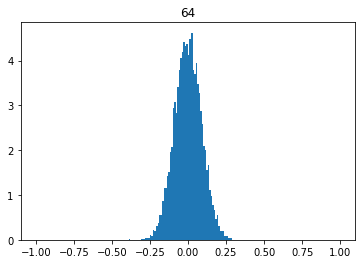

In [46]:
import matplotlib.pyplot as plt
def plot_RV_Y(lower = -1.0, upper = 1.0, leastCount = 0.001, size = count, pdf = M, bins = 200):
    size = int(size/10)
    random_var_array=[]
    for i in [1,2,4,8,16,32,64]:
        random_var_array.append(draw_RV_Y(i, lower,upper,leastCount,size,pdf))
        count, bins, ignored = plt.hist(random_var_array[-1], bins, density = True)
        plt.title(i)
        plt.show()
    return random_var_array
final_array = plot_RV_Y()


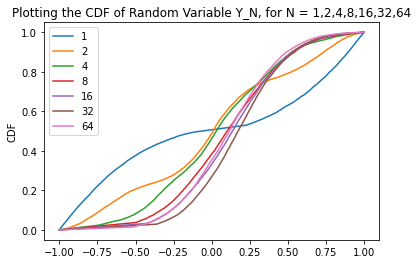

In [40]:
def plot_cdf_Y(final_arr, count):
    least_count=0.001
    main_index=1
    for arr in final_arr:
        sorted_arr = np.sort(arr)
        ans=[]
        val=sorted_arr[0]
        index=0
        for i in sorted_arr:
            index+=1
            if i >val+least_count:
                val+=least_count
                ans.append(index/count)
        plt.plot(np.linspace(-1, 1, len(ans)), ans, label = str(main_index))
        main_index*=2
    plt.ylabel("CDF")
    plt.title("Plotting the CDF of Random Variable Y_N, for N = 1,2,4,8,16,32,64")
    plt.legend()   
    plt.savefig("graph.png", dpi=1000)
    plt.show()


plot_cdf_Y( final_array, len(final_array[-1]) )